In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [376]:
N2_input = pd.read_csv('data/N2_input.csv', index_col='cycle')
N2_target = pd.read_csv('data/N2_target.csv', index_col='cycle')
NH3_input = pd.read_csv('data/NH3_input.csv', index_col='cycle')
NH3_target = pd.read_csv('data/NH3_target.csv', index_col='cycle')
N2_input.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000423,0.000040,0.000463,0.000644,0.0,0.000060,0.000141,0.0,...,0.0,0.00002,0.00000,0.000000,0.000262,0.001087,0.000000,0.0,0.0,0.00004
1,0.0,0.0,0.000486,0.000405,0.000142,0.000546,0.0,0.000040,0.000000,0.0,...,0.0,0.00000,0.00000,0.000182,0.000101,0.001011,0.000000,0.0,0.0,0.00000
2,0.0,0.0,0.000261,0.000000,0.000221,0.000483,0.0,0.000241,0.000000,0.0,...,0.0,0.00000,0.00004,0.000101,0.000282,0.000825,0.000000,0.0,0.0,0.00000
3,0.0,0.0,0.000081,0.000000,0.000485,0.000546,0.0,0.000000,0.000162,0.0,...,0.0,0.00000,0.00000,0.000121,0.000040,0.001092,0.000202,0.0,0.0,0.00000
4,0.0,0.0,0.000120,0.000000,0.000160,0.000642,0.0,0.000261,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.000000,0.000822,0.000000,0.0,0.0,0.00000


(array([71., 23., 12., 10.,  2.,  1.]),
 array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]),
 <BarContainer object of 6 artists>)

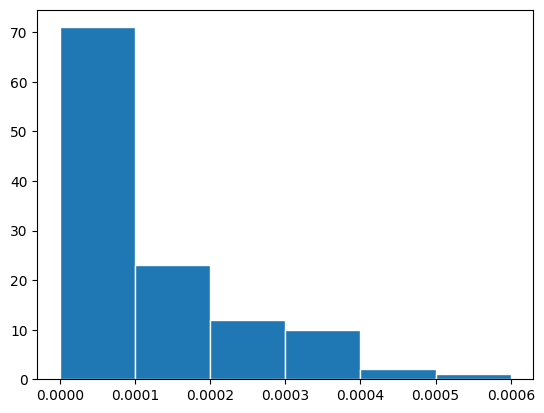

In [377]:
plt.hist(N2_input.iloc[:,3].values, bins=np.arange(0,0.0007,0.0001), edgecolor='white')

In [378]:
# spectral range
N2_input = N2_input.iloc[:,range(294,1813)]
NH3_input = NH3_input.iloc[:,range(294,1813)]

In [379]:
for i in range(len(N2_input.index)):
    for j in range(len(N2_input.columns)):
        if N2_input.iloc[i,j]<0.0001:
            N2_input.iloc[i,j]=0

for i in range(len(NH3_input.index)):
    for j in range(len(NH3_input.columns)):
        if NH3_input.iloc[i,j]<0.0001:
            NH3_input.iloc[i,j]=0

In [380]:
N2_input.columns = [round(float(i), 1) for i in N2_input.columns.values]
NH3_input.columns = [round(float(i), 1) for i in NH3_input.columns.values]

In [381]:
# interpolation
import numpy as np
new_col = np.arange(NH3_input.columns[0], NH3_input.columns[-1]+0.1, 0.1)
NH3_input_inter = pd.DataFrame(columns=new_col, index=NH3_input.index)
for idx, row in NH3_input.iterrows():
    NH3_input_inter.iloc[idx] = np.interp(new_col, NH3_input.columns.values, NH3_input.iloc[idx])
NH3_input_inter.index.name = 'cycle'
NH3_input_inter

,199.7,199.8,199.9,200.0,200.1,200.2,200.3,200.4,200.5,200.6,...,1049.4,1049.5,1049.6,1049.7,1049.8,1049.9,1050.0,1050.1,1050.2,1050.3
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000319,0.000638,0.000957,0.001276,...,0.014762,0.013578,0.012393,0.011208,0.010889,0.01057,0.010252,0.009933,0.009614,0.009295
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012322,0.011348,0.010374,0.0094,0.009358,0.009316,0.009273,0.009231,0.009189,0.009146
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000457,0.000914,0.001372,0.001829,...,0.008354,0.007814,0.007273,0.006733,0.006983,0.007232,0.007481,0.007731,0.00798,0.008229
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000279,0.000557,0.000836,0.001114,...,0.010623,0.009947,0.00927,0.008594,0.007878,0.007162,0.006445,0.005729,0.005013,0.004297
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008063,0.007588,0.007114,0.00664,0.006086,0.005533,0.00498,0.004427,0.003873,0.00332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.0,0.0,0.0,0.000586,0.001172,0.001757,0.002343,...,0.00816,0.007616,0.007072,0.006528,0.006193,0.005858,0.005523,0.005189,0.004854,0.004519
59,0.0,0.0,0.0,0.0,0.0,0.0,0.000216,0.000431,0.000647,0.000862,...,0.009573,0.009487,0.009401,0.009314,0.008064,0.006813,0.005563,0.004312,0.003062,0.001811
60,0.0,0.0,0.0,0.0,0.0,0.0,0.000041,0.000082,0.000123,0.000164,...,0.007639,0.006982,0.006325,0.005668,0.005627,0.005586,0.005545,0.005504,0.005462,0.005421


In [382]:
new_col = np.arange(N2_input.columns[0], N2_input.columns[-1]+0.1, 0.1)
N2_input_inter = pd.DataFrame(columns=new_col, index=N2_input.index)
for idx, row in N2_input.iterrows():
    N2_input_inter.iloc[idx] = np.interp(new_col, N2_input.columns.values, N2_input.iloc[idx])
N2_input_inter.index.name = 'cycle'
N2_input_inter

,199.7,199.8,199.9,200.0,200.1,200.2,200.3,200.4,200.5,200.6,...,1049.4,1049.5,1049.6,1049.7,1049.8,1049.9,1050.0,1050.1,1050.2,1050.3
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00007,0.000141,0.000211,0.000282,...,0.028869,0.028637,0.028405,0.028174,0.027788,0.027402,0.027016,0.02663,0.026244,0.025858
1,0.0,0.000036,0.000073,0.000109,0.000146,0.000182,0.000239,0.000297,0.000354,0.000411,...,0.029687,0.029333,0.028979,0.028625,0.028156,0.027687,0.027219,0.02675,0.026281,0.025813
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000091,0.000181,0.000272,0.000362,...,0.030671,0.030262,0.029853,0.029444,0.029075,0.028706,0.028338,0.027969,0.0276,0.027231
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000108,0.000216,0.000324,0.000431,...,0.030916,0.030569,0.030222,0.029875,0.029403,0.028931,0.028459,0.027987,0.027515,0.027043
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.000087,0.00013,0.000174,...,0.031805,0.031401,0.030996,0.030592,0.030177,0.029763,0.029348,0.028933,0.028519,0.028104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.0,0.0,0.0,0.0,0.0,0.000129,0.000259,0.000388,0.000517,...,0.046115,0.045774,0.045432,0.045091,0.044426,0.043762,0.043097,0.042433,0.041768,0.041104
115,0.000301,0.000284,0.000267,0.00025,0.000232,0.000215,0.000265,0.000316,0.000366,0.000416,...,0.047144,0.046803,0.046462,0.046122,0.045225,0.044328,0.043431,0.042535,0.041638,0.040741
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0001,0.000201,0.000301,0.000402,...,0.047443,0.046887,0.046331,0.045775,0.045143,0.044511,0.04388,0.043248,0.042617,0.041985


In [383]:
NH3_input_inter = NH3_input_inter.iloc[:,3:8504]
N2_input_inter = N2_input_inter.iloc[:,3:8504]

In [384]:
NH3_input_inter

,200.0,200.1,200.2,200.3,200.4,200.5,200.6,200.7,200.8,200.9,...,1049.1,1049.2,1049.3,1049.4,1049.5,1049.6,1049.7,1049.8,1049.9,1050.0
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000319,0.000638,0.000957,0.001276,0.001595,0.001914,0.002296,...,0.018316,0.017131,0.015947,0.014762,0.013578,0.012393,0.011208,0.010889,0.01057,0.010252
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000203,...,0.015244,0.01427,0.013296,0.012322,0.011348,0.010374,0.0094,0.009358,0.009316,0.009273
2,0.0,0.0,0.0,0.000457,0.000914,0.001372,0.001829,0.002286,0.002743,0.002195,...,0.009975,0.009435,0.008894,0.008354,0.007814,0.007273,0.006733,0.006983,0.007232,0.007481
3,0.0,0.0,0.0,0.000279,0.000557,0.000836,0.001114,0.001393,0.001671,0.001671,...,0.012652,0.011976,0.011299,0.010623,0.009947,0.00927,0.008594,0.007878,0.007162,0.006445
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000854,...,0.009485,0.009011,0.008537,0.008063,0.007588,0.007114,0.00664,0.006086,0.005533,0.00498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.000586,0.001172,0.001757,0.002343,0.002929,0.003515,0.003364,...,0.009792,0.009248,0.008704,0.00816,0.007616,0.007072,0.006528,0.006193,0.005858,0.005523
59,0.0,0.0,0.0,0.000216,0.000431,0.000647,0.000862,0.001078,0.001294,0.001708,...,0.009832,0.009746,0.009659,0.009573,0.009487,0.009401,0.009314,0.008064,0.006813,0.005563
60,0.0,0.0,0.0,0.000041,0.000082,0.000123,0.000164,0.000205,0.000246,0.000197,...,0.009611,0.008954,0.008296,0.007639,0.006982,0.006325,0.005668,0.005627,0.005586,0.005545


In [385]:
N2_input_inter

,200.0,200.1,200.2,200.3,200.4,200.5,200.6,200.7,200.8,200.9,...,1049.1,1049.2,1049.3,1049.4,1049.5,1049.6,1049.7,1049.8,1049.9,1050.0
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.00007,0.000141,0.000211,0.000282,0.000352,0.000423,0.000455,...,0.029563,0.029332,0.0291,0.028869,0.028637,0.028405,0.028174,0.027788,0.027402,0.027016
1,0.000109,0.000146,0.000182,0.000239,0.000297,0.000354,0.000411,0.000469,0.000526,0.000542,...,0.030749,0.030395,0.030041,0.029687,0.029333,0.028979,0.028625,0.028156,0.027687,0.027219
2,0.0,0.0,0.0,0.000091,0.000181,0.000272,0.000362,0.000453,0.000543,0.000515,...,0.031897,0.031488,0.031079,0.030671,0.030262,0.029853,0.029444,0.029075,0.028706,0.028338
3,0.0,0.0,0.0,0.000108,0.000216,0.000324,0.000431,0.000539,0.000647,0.000599,...,0.031958,0.031611,0.031263,0.030916,0.030569,0.030222,0.029875,0.029403,0.028931,0.028459
4,0.0,0.0,0.0,0.000043,0.000087,0.00013,0.000174,0.000217,0.000261,0.000289,...,0.033019,0.032615,0.03221,0.031805,0.031401,0.030996,0.030592,0.030177,0.029763,0.029348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.0,0.0,0.000129,0.000259,0.000388,0.000517,0.000647,0.000776,0.000672,...,0.047139,0.046797,0.046456,0.046115,0.045774,0.045432,0.045091,0.044426,0.043762,0.043097
115,0.00025,0.000232,0.000215,0.000265,0.000316,0.000366,0.000416,0.000466,0.000517,0.000538,...,0.048166,0.047826,0.047485,0.047144,0.046803,0.046462,0.046122,0.045225,0.044328,0.043431
116,0.0,0.0,0.0,0.0001,0.000201,0.000301,0.000402,0.000502,0.000603,0.000633,...,0.049112,0.048556,0.047999,0.047443,0.046887,0.046331,0.045775,0.045143,0.044511,0.04388


In [386]:
from numpy import random
x = []
while len(set(x))<63:
    x.append(random.randint(1, 118))
len(list(set(x)))

63

In [387]:
# striking the balance between N2 and Nh3 datasets
N2_input = N2_input_inter.iloc[list(set(x)),:]
N2_target = N2_target.iloc[list(set(x)),:]
print(len(N2_input), len(N2_target))

63 63


In [388]:
# combine N2 and NH3 data
data = pd.concat([N2_input, NH3_input_inter])
target = pd.concat([N2_target, NH3_target])

print(len(data), len(target))
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

126 126


In [389]:
from sklearn.linear_model import LinearRegression

for idx, col in enumerate(target.columns):
    rl = LinearRegression()
    rl.fit(train_input, train_target[col])
    print(f'[{col}]', 'train score :', np.round(rl.score(train_input, train_target[col]),3), 'test score :', np.round(rl.score(test_input, test_target[col]), 3))

rl = LinearRegression()
rl.fit(train_input, train_target)
print('[All] :', 'train score :', rl.score(train_input, train_target), 'test score :', np.round(rl.score(test_input, test_target),3))

[C1s] train score : 1.0 test score : 0.998
[N1s] train score : 1.0 test score : 0.824
[O1s] train score : 1.0 test score : 0.942
[Si2p] train score : 1.0 test score : 0.392
[Cl2p] train score : 1.0 test score : 0.999
[All] : train score : 1.0 test score : 0.831


In [390]:
ref = pd.read_excel('../file/etc/emission_spectrum.xlsx')
ref.head()

,name,wavelength
0,SiN,353.5
1,SiN,404.8
2,SiN,405.1
3,SiN,408.0
4,SiN,408.7


49.8 4791.861553492917


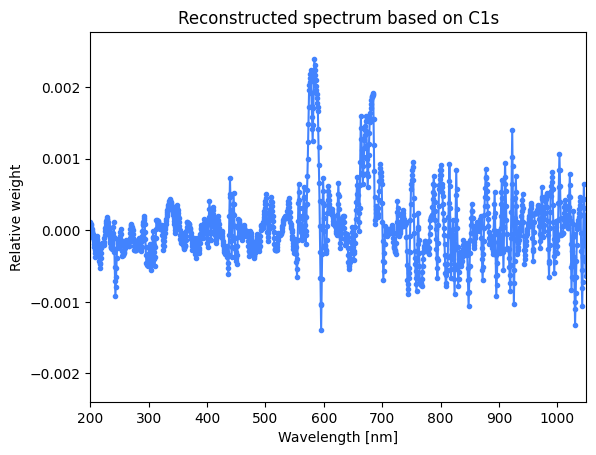

In [396]:
import random
random.seed(1)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(30)]

wv_c = []
name_c = []
for idx, row in ref.iterrows():
    if 'C' in row['name']:
        wv_c.append(row['wavelength'])
        name_c.append(row['name'])

col = 'C1s'
i=0
rl_c = LinearRegression(positive=False, fit_intercept=True)
rl_c.fit(train_input, train_target[col])

# wavelength scaling
wv = np.arange(len(rl_c.coef_)) * 1142 / 2047 + 49.8
print(wv[0], wv[-1])

plt.plot(wv, rl_c.coef_, '.-', color=colors[i])
# plt.bar(wv_c, np.ones(len(wv_C)), color=colors[i+1])
plt.xlim(200,1050)
# plt.ylim(0,rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

reconstructed = []
reconstructed.append(rl_c.coef_)

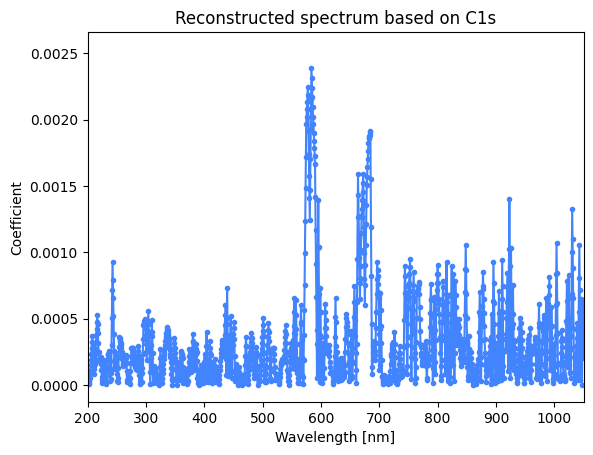

In [398]:
i=0
plt.plot(wv, abs(rl_c.coef_), '.-', color=colors[i])
# plt.bar(wv_c, np.ones(len(wv_C)), color=colors[i+1])
plt.xlim(200,1050)
# plt.ylim(0,rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Coefficient')
plt.show()

In [399]:
df_c = pd.DataFrame(zip(wv_c, name_c), columns=['wavelength','name'])
df_c = df_c.sort_values(by='wavelength').reset_index()
df_c

,index,wavelength,name
0,284,104.7,CO+
1,279,204.6,CO
2,278,206.2,CO
3,277,206.8,CO
4,276,209.0,CO
...,...,...,...
328,65,822.2,Cl
329,66,833.3,Cl
330,67,837.6,Cl
331,68,842.8,Cl


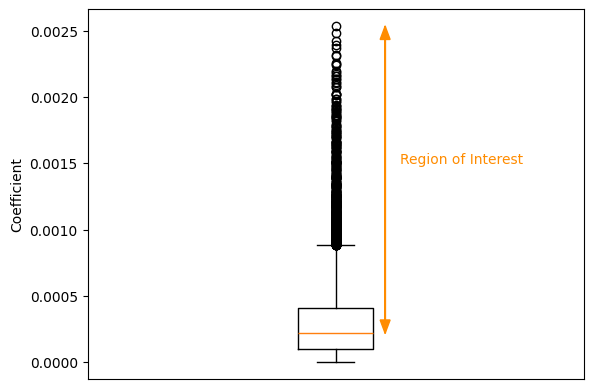

0.00041098923778792694
0.0007786142338402928


In [400]:
upper_b = np.quantile(abs(rl_c.coef_), 0.5)
box_max = abs(rl_c.coef_).max()

# boxplot
plt.boxplot(abs(rl_c.coef_))
plt.arrow(1.1, upper_b, 0, dy=box_max-upper_b,
         length_includes_head = True, head_width = 0.02, head_length = 0.0001, color='darkorange')
plt.arrow(1.1, box_max, 0, dy=-(box_max-upper_b),
         length_includes_head = True, head_width = 0.02, head_length = 0.0001, color='darkorange')
plt.text(1.13, 0.0015, 'Region of Interest', color='darkorange')
plt.xticks([])
plt.ylabel('Coefficient')
plt.show()

print(np.quantile(abs(rl_c.coef_), 0.75))
print(np.mean(abs(rl_c.coef_)) + 1.5*(np.quantile(abs(rl_c.coef_), 0.75) - np.quantile(abs(rl_c.coef_), 0.25)))


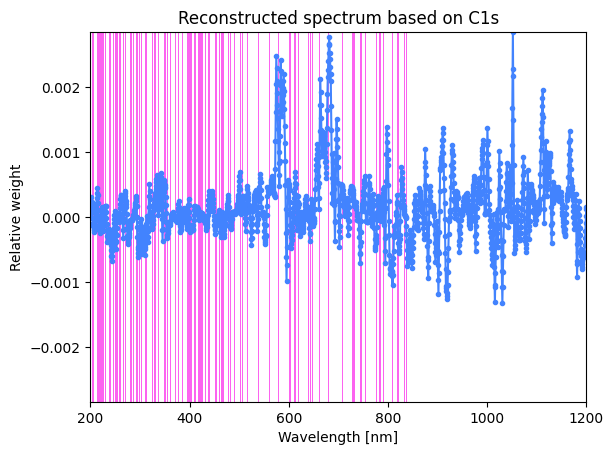

In [345]:
plt.plot(wv, rl_c.coef_, '.-', color=colors[i])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[i+1])
plt.bar(wv_c, -rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(-rl_c.coef_.max(),rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

In [99]:
rl_c.coef_.max()

0.01893397947313525

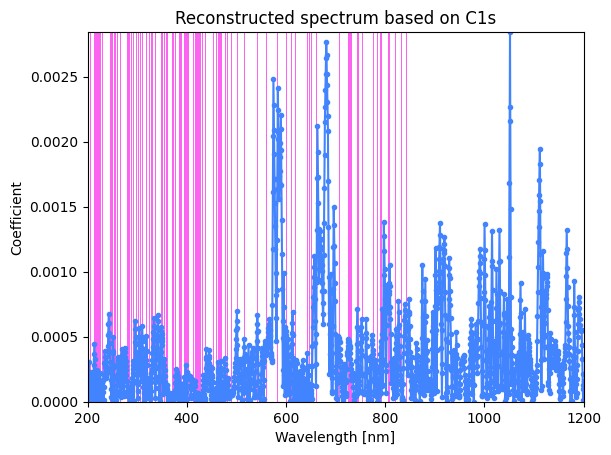

In [344]:
i=0
plt.plot(wv, abs(rl_c.coef_), '.-', color=colors[i])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[i+1])
# plt.bar(wv_c, -rl_c.coef_.max()*np.ones(len(wv_C)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Coefficient')
plt.show()

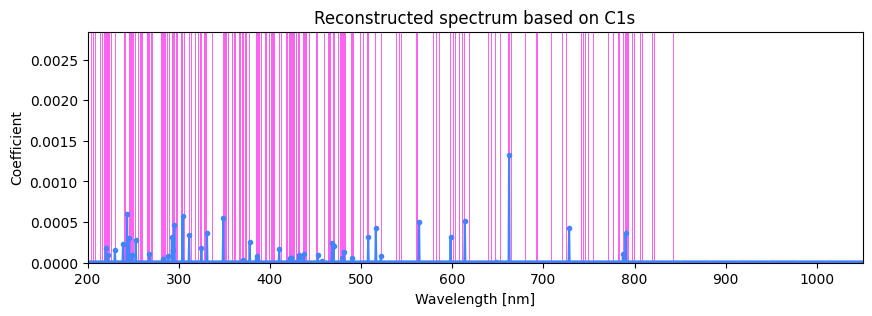

In [347]:
ref_c = [] # boolean array
for i in wv:
    if round(i,1) in [round(j,1) for j in wv_c]:
        ref_c.append(1)
    else:
        ref_c.append(0)
        
plot_c = np.array(abs(rl_c.coef_)) * np.array(ref_c) 
plt.figure(figsize=(10,3))
plt.plot(wv, plot_c, '.-', color=colors[0])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[1])
plt.xlim(200,1050)
plt.ylim(0,rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Coefficient')
plt.show()

In [401]:
# alternatively, find a local maximum around the given lines with a margin set by an user considering a limitation of a spectrometer
wv_c_max_idx = []
wv_c_shift = [] # to estimate the limit of resolustion
for idx, b in enumerate(ref_c):
    if b == 1:
        temp = np.arange(idx-5, idx+5, 1) # margin += 1 nm
        temp_idx = idx + np.argmax(abs(rl_c.coef_)[temp]) - 5
        wv_c_max_idx.append(temp_idx)
        wv_c_shift.append(idx-temp_idx)
    else:
        continue

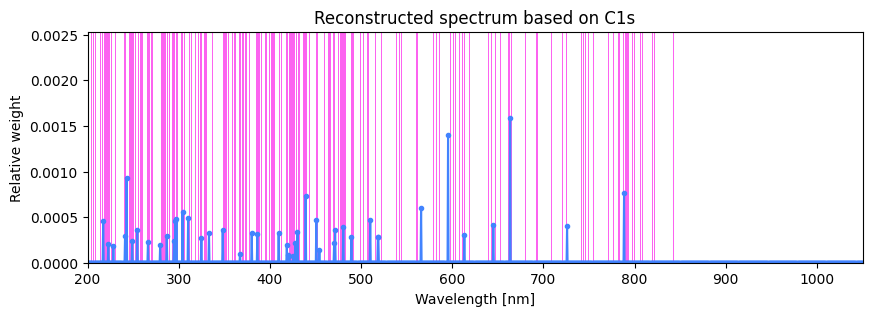

In [402]:
ref_c2 = [] # boolean array
for i in wv:
    if round(i,1) in [round(j,1) for j in wv[wv_c_max_idx]]:
        ref_c2.append(1)
    else:
        ref_c2.append(0)

plot_c2 = np.array(abs(rl_c.coef_)) * np.array(ref_c2) 
plt.figure(figsize=(10,3))
plt.plot(wv, plot_c2, '.-', color=colors[0])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[1])
plt.xlim(200,1050)
plt.ylim(0,rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

In [350]:
# the error bound needs to be adjusted to capture the maximum peak at 336.13 nm
def adjustError(margin):
    wv_c_max_idx = []
    wv_c_shift = [] # to estimate the limit of resolustion
    wv_c_idx = [] ##
    for idx, b in enumerate(ref_c):
        if b == 1:
            temp = np.arange(idx-margin, idx+margin, 1) # margin += 1 nm
            temp_idx = idx + np.argmax(abs(rl_c.coef_)[temp]) - margin
            wv_c_max_idx.append(temp_idx)
            wv_c_shift.append(idx-temp_idx)
            wv_c_idx.append(idx) ##
        else:
            continue

    ref_c2 = [] # boolean array
    for i in wv:
        if round(i,1) in [round(j,1) for j in wv[wv_c_max_idx]]:
            ref_c2.append(1)
        else:
            ref_c2.append(0)
    
    plot_c2 = np.array(abs(rl_c.coef_)) * np.array(ref_c2) 
    plt.figure(figsize=(10,3))
    plt.plot(wv, plot_c2, '.-', color=colors[0])
    plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[1])
    plt.xlim(200,1050)
    plt.ylim(0,rl_c.coef_.max())
    plt.title(f'Tolerance: ±{round(0.1*margin, 1)} nm')
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Coefficient')
    plt.show()

    print(f'margin : {margin}, mean shift : {np.mean(np.array(wv_c_shift))}')
    return wv_c_idx, wv_c_shift

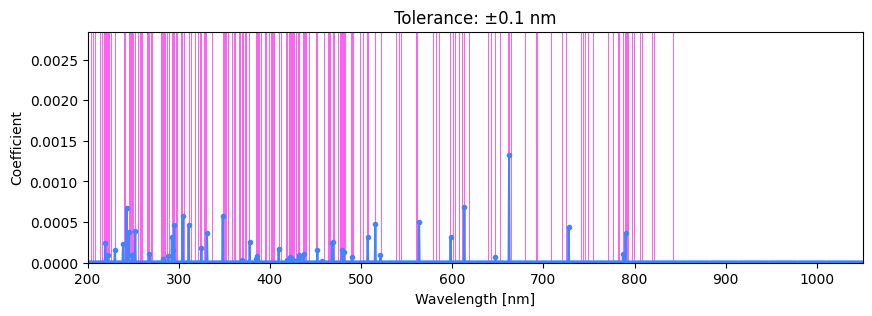

margin : 1, mean shift : 0.4807692307692308


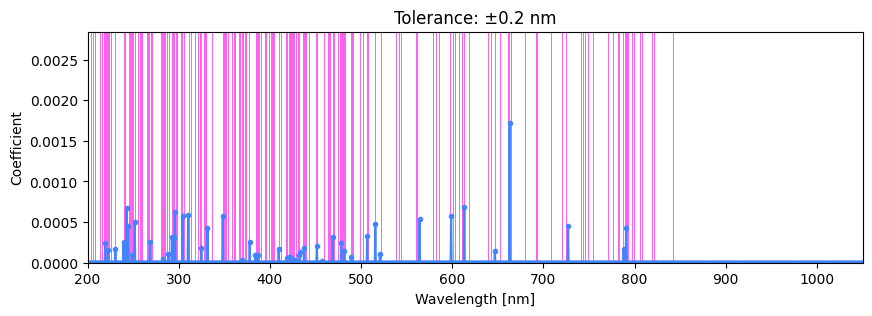

margin : 2, mean shift : 0.4423076923076923


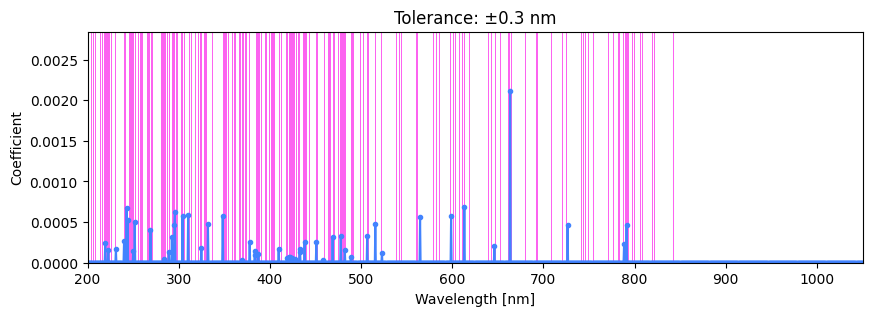

margin : 3, mean shift : 0.2692307692307692


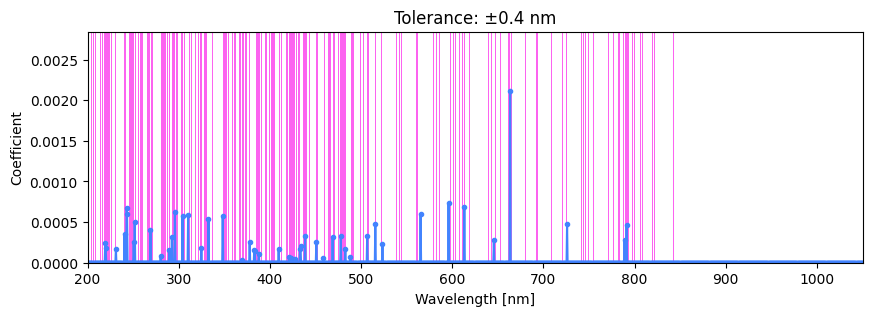

margin : 4, mean shift : 0.36538461538461536


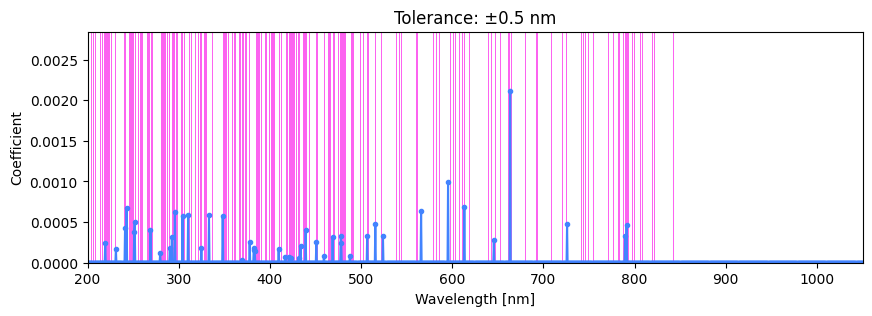

margin : 5, mean shift : 0.6538461538461539


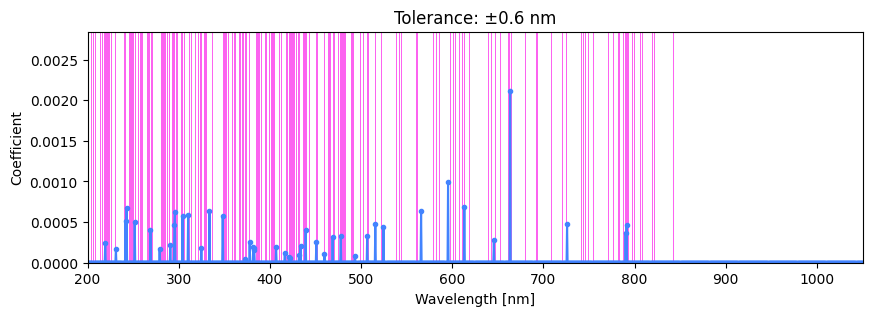

margin : 6, mean shift : 0.3076923076923077


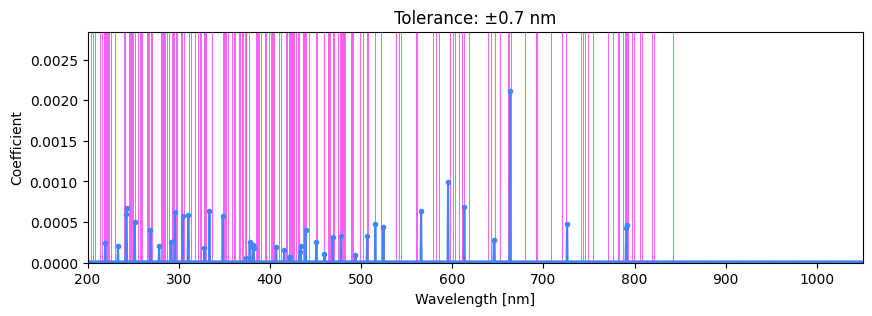

margin : 7, mean shift : 0.09615384615384616


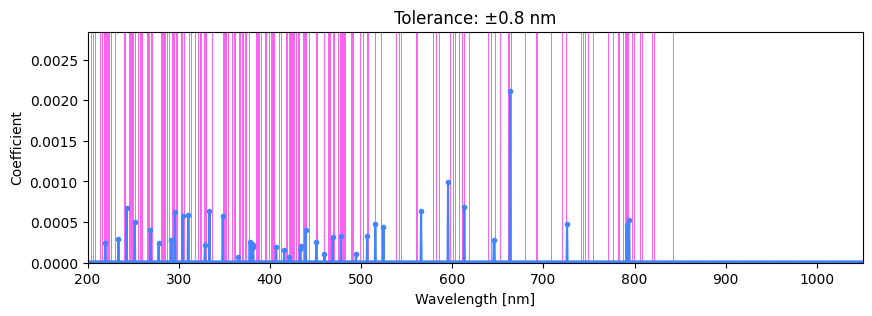

margin : 8, mean shift : 0.23076923076923078


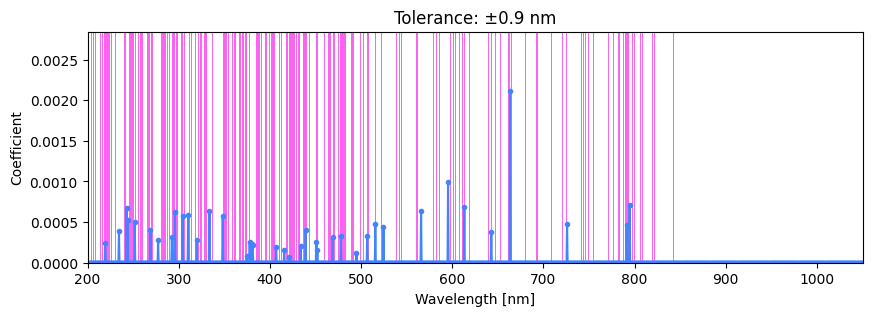

margin : 9, mean shift : 0.8269230769230769


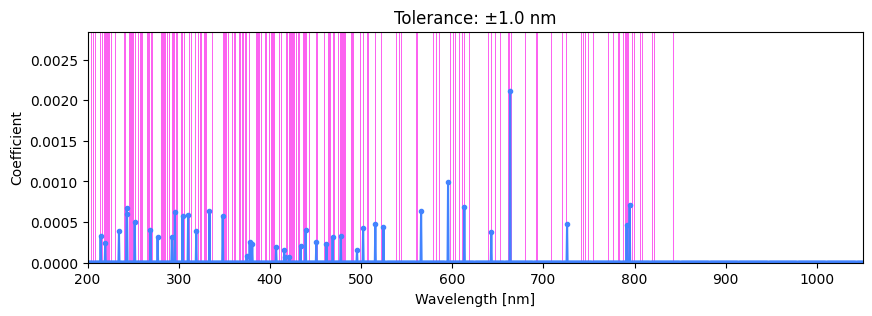

margin : 10, mean shift : 1.0192307692307692


In [352]:
for i in range(1,11,1):
    adjustError(i)

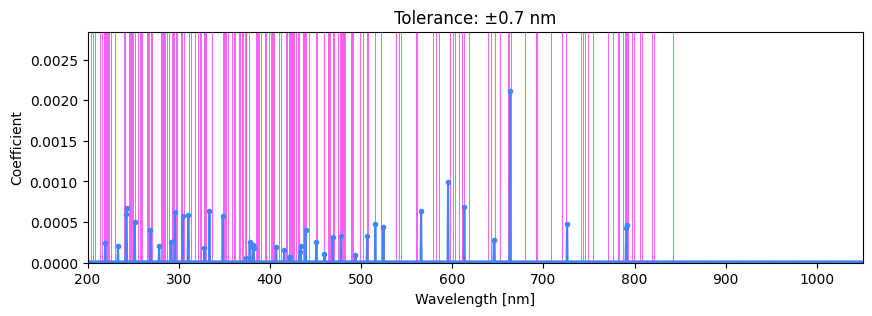

margin : 7, mean shift : 0.09615384615384616


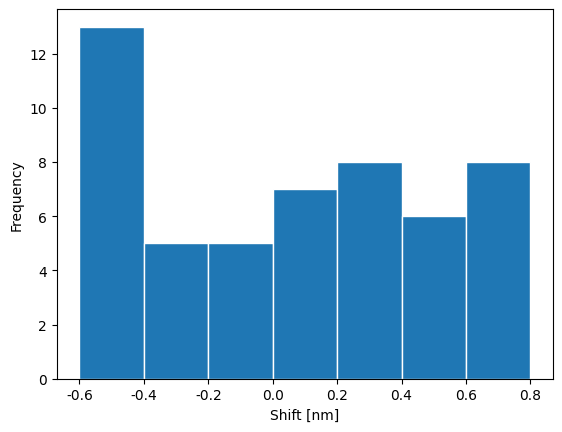

In [353]:
idx7, shift7 = adjustError(7)
plt.hist(shift7, edgecolor='white', bins=np.arange(-6, 10, 2))
plt.xlabel('Shift [nm]')
plt.xticks(np.arange(-6, 10, 2), labels=[round(i,1) for i in np.arange(-6, 10, 2)*0.1])
plt.ylabel('Frequency')
plt.show()

In [403]:
# the error bound needs to be adjusted to capture the maximum peak at 336.13 nm
def adjustErrorRight(margin):
    wv_c_max_idx = []
    wv_c_shift = [] # to estimate the limit of resolustion
    for idx, b in enumerate(ref_c):
        if b == 1:
            temp = np.arange(idx, idx+margin, 1) # right margin
            temp_idx = idx + np.argmax(abs(rl_c.coef_)[temp])
            wv_c_max_idx.append(temp_idx)
            wv_c_shift.append(temp_idx-idx)
        else:
            continue

    ref_c2 = [] # boolean array
    for i in wv:
        if round(i,1) in [round(j,1) for j in wv[wv_c_max_idx]]:
            ref_c2.append(1)
        else:
            ref_c2.append(0)
    
    plot_c2 = np.array(abs(rl_c.coef_)) * np.array(ref_c2) 
    plt.figure(figsize=(10,3))
    plt.plot(wv, plot_c2, '.-', color=colors[0])
    plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[1])
    plt.xlim(200,1050)
    plt.ylim(0,rl_c.coef_.max())
    plt.title(f'Tolerance: +{round(0.1*margin, 1)} nm')
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Coefficient')
    plt.show()

    print(f'margin : {margin}, mean shift : {np.mean(np.array(wv_c_shift))}')
    return wv, plot_c2, wv_c_shift

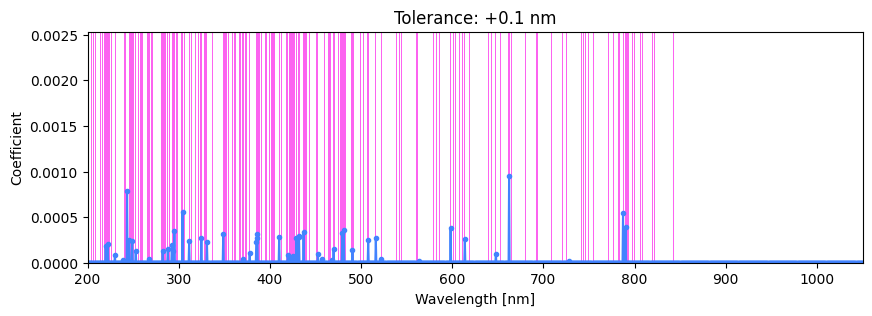

margin : 1, mean shift : 0.0


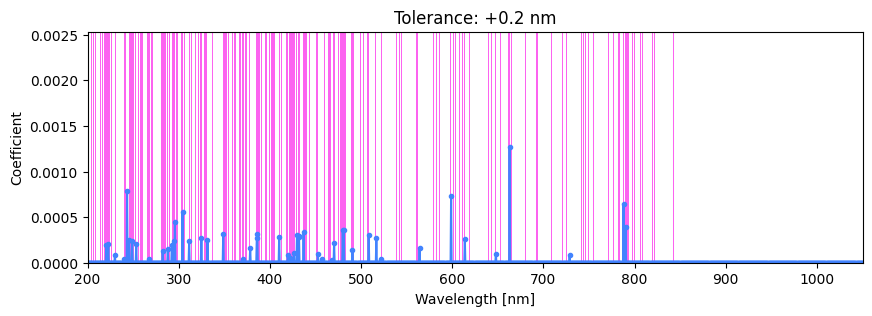

margin : 2, mean shift : 0.4230769230769231


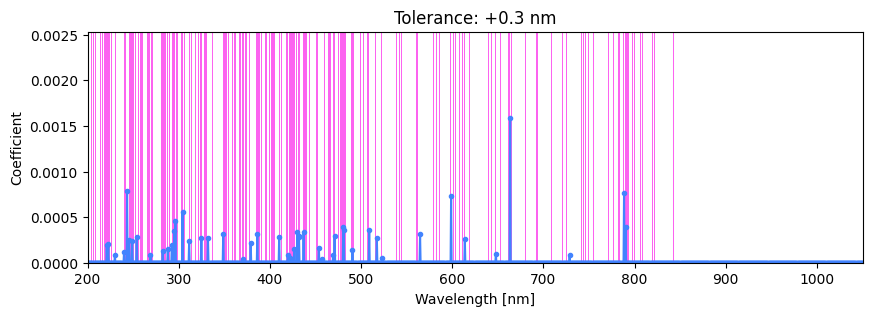

margin : 3, mean shift : 0.8846153846153846


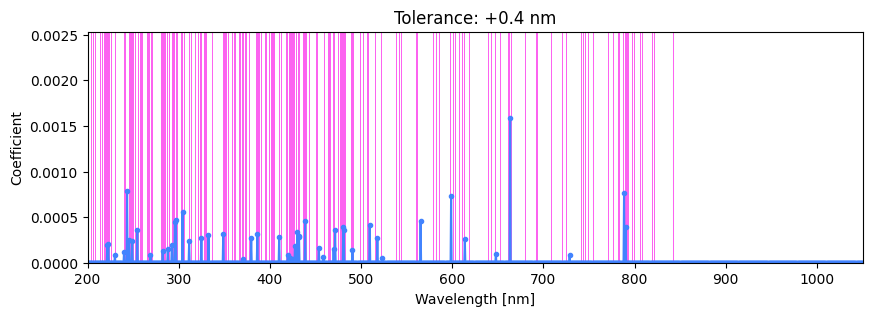

margin : 4, mean shift : 1.3076923076923077


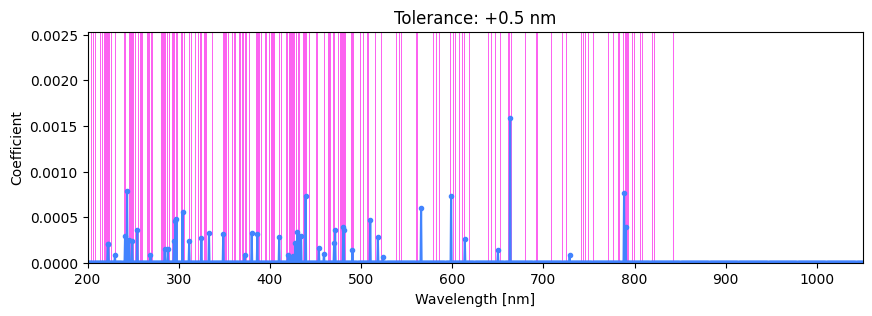

margin : 5, mean shift : 2.076923076923077


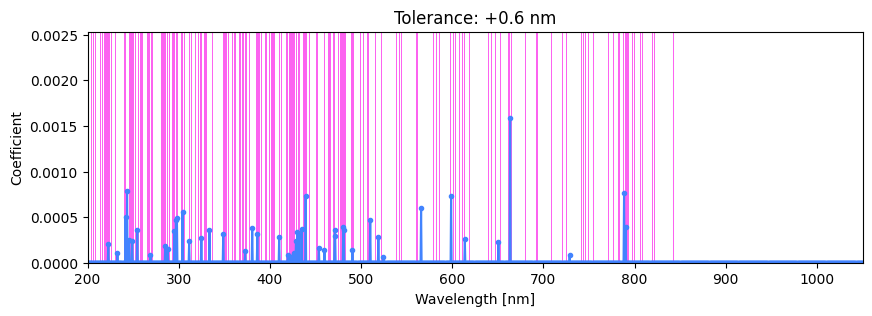

margin : 6, mean shift : 2.519230769230769


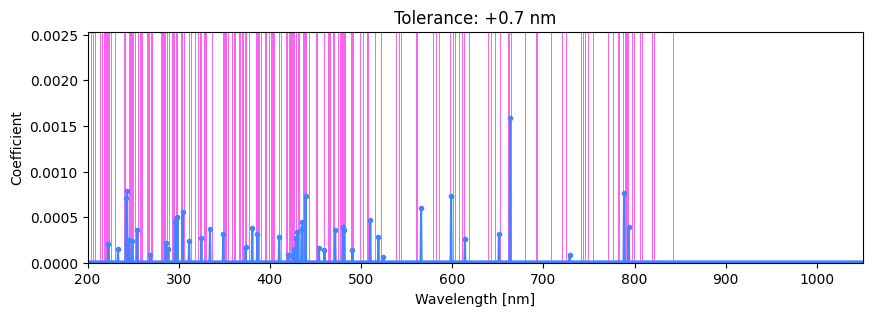

margin : 7, mean shift : 3.1346153846153846


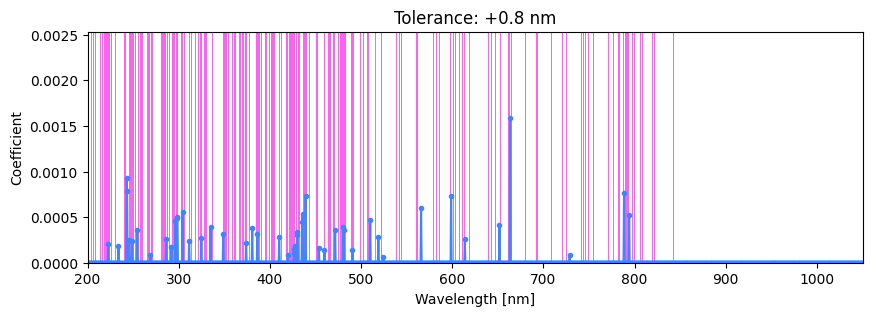

margin : 8, mean shift : 3.5576923076923075


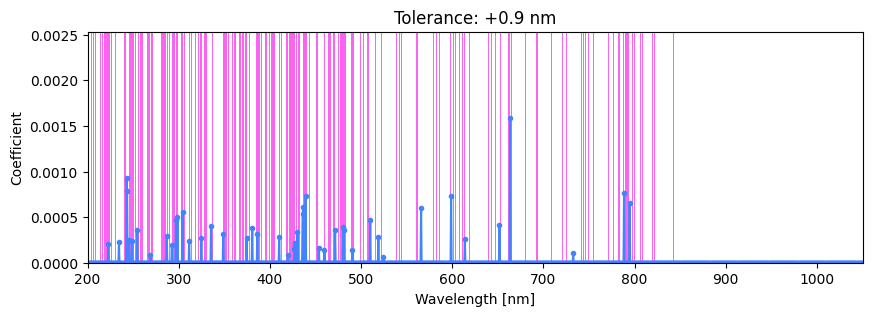

margin : 9, mean shift : 3.9615384615384617


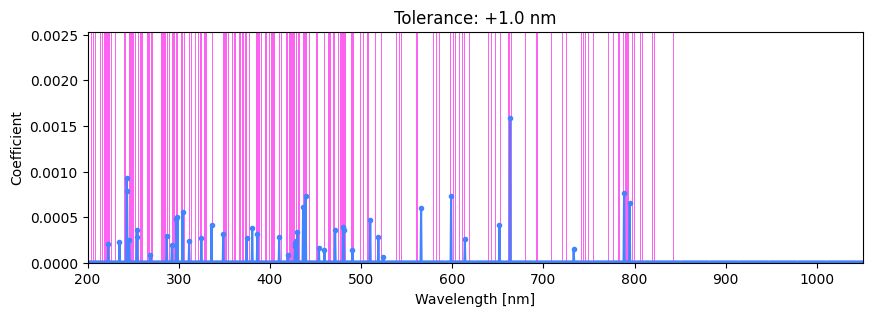

margin : 10, mean shift : 4.288461538461538


In [404]:
for i in range(1,11,1):
    adjustErrorRight(i)

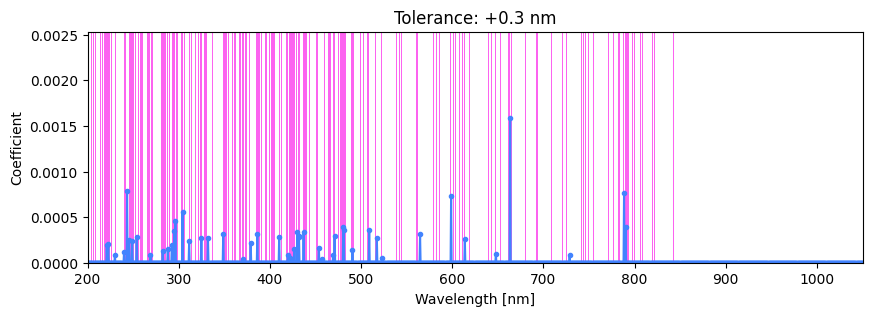

margin : 3, mean shift : 0.8846153846153846


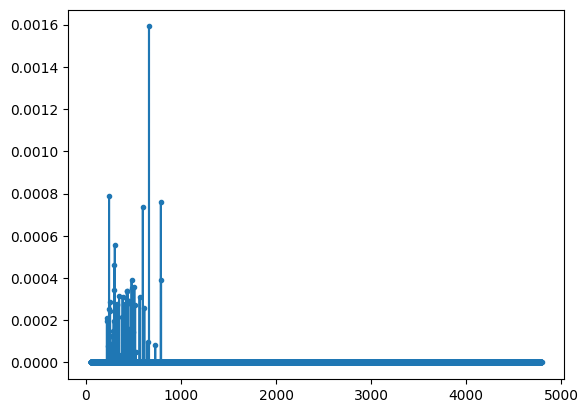

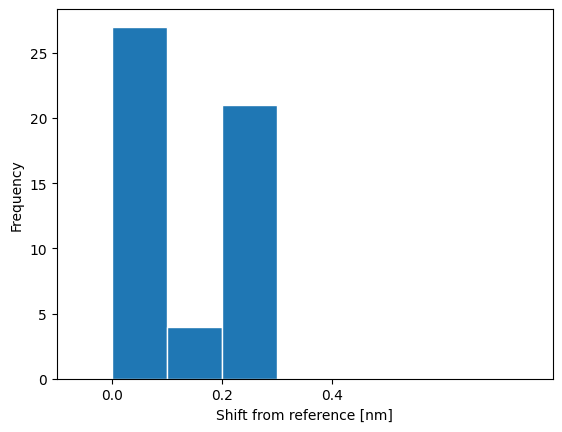

In [413]:
wv3, idx3, shift3 = adjustErrorRight(3)

plt.plot(wv3, idx3, '.-')
plt.show()

plt.hist(shift3, edgecolor='white', bins=np.arange(0, 10, 1))
plt.xlabel('Shift from reference [nm]')
plt.xticks(np.arange(0, 5, 2), labels=[round(i,1) for i in np.arange(0, 5, 2)*0.1])
plt.xlim(-1,8)
plt.ylabel('Frequency')
plt.show()

In [415]:
print(np.mean(shift3), np.std(shift3))

0.8846153846153846 0.9538151359720957


In [407]:
df3 = pd.DataFrame(zip(wv3, idx3), columns=['wavelength','coefficient'])
# pd.DataFrame(idx7).to_csv('data/C_coefficients.csv')
df3.head()

,wavelength,coefficient
0,49.800000,0.0
1,50.357890,0.0
2,50.915779,0.0
3,51.473669,0.0
4,52.031558,0.0


In [408]:
idx_cut = df3[df3['coefficient']>np.quantile(abs(rl_c.coef_), 0.5)]
idx_cut

,wavelength,coefficient
347,243.387689,0.000790
351,245.619248,0.000253
357,248.966585,0.000242
366,253.987592,0.000285
440,295.271422,0.000343
442,296.387201,0.000460
456,304.197655,0.000554
469,311.450220,0.000240
493,324.839570,0.000271
506,332.092135,0.000277


In [409]:
# compare get names which correspond to these wavelengths
df_c.head()

,index,wavelength,name
0,284,104.7,CO+
1,279,204.6,CO
2,278,206.2,CO
3,277,206.8,CO
4,276,209.0,CO


In [410]:
add_names = []
for idx1, row1 in idx_cut.iterrows():
    temp = []
    for idx2, row2 in df_c.iterrows():
        if abs(row1['wavelength'] - row2['wavelength'])<=0.7:
            temp.append(row2['name'])
    add_names.append(temp)
len(add_names)

28

In [411]:
idx_cut['name'] = add_names
idx_cut

C:\Users\syj43\AppData\Local\Temp\ipykernel_2700\2831590689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idx_cut['name'] = add_names


,wavelength,coefficient,name
347,243.387689,0.000790,"[C4H2, CO]"
351,245.619248,0.000253,"[SiCl, CO, CO]"
357,248.966585,0.000242,"[CO, C2, CO]"
366,253.987592,0.000285,[Cl2]
440,295.271422,0.000343,[CN]
442,296.387201,0.000460,[]
456,304.197655,0.000554,[CN]
469,311.450220,0.000240,"[CO, CHO, C3H3]"
493,324.839570,0.000271,"[CO, HCl, CO2, CO2+]"
506,332.092135,0.000277,[C3H3]


In [324]:
idx_cut.to_csv('data/C_names')

In [299]:
wv_N = []
for idx, row in ref.iterrows():
    if row['name'].find('N') == True:
        wv_N.append(row['wavelength'])
len(wv_N)

42

In [300]:
wv_N = []
for idx, row in ref.iterrows():
    if 'N' in row['name']:
        wv_N.append(row['wavelength'])

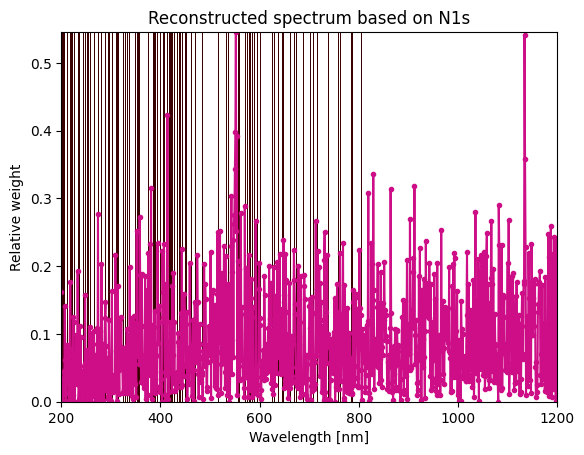

In [301]:
col ='N1s'
i=2
rl_N = LinearRegression()
rl_N.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_N.coef_), '.-', color=colors[i])
plt.bar(wv_N, np.ones(len(wv_N)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_N.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

In [ ]:
ref_c = []
for i in wv:
    if round(i,1) in [round(j,1) for j in wv_c]:
        ref_c.append(1)
    else:
        ref_c.append(0)
        
plot_c = np.array(abs(rl_c.coef_)) * np.array(ref_c)
plt.figure(figsize=(10,3))
plt.plot(wv, plot_c, '.-', color=colors[0])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_C)), color=colors[1])
plt.xlim(200,1200)
plt.ylim(0,plot_c.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

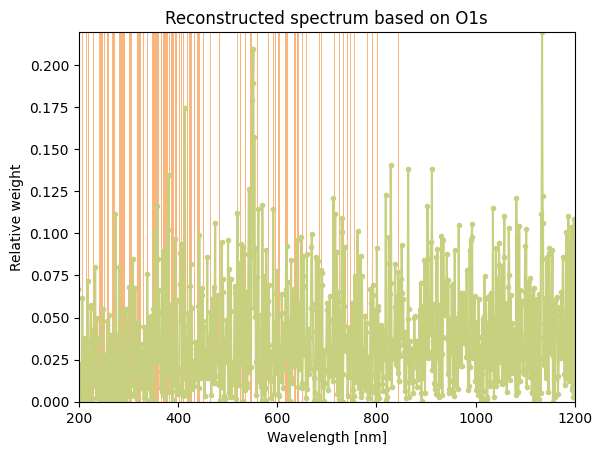

In [239]:
wv_O = []
for idx, row in ref.iterrows():
    if 'O' in row['name']:
        wv_O.append(row['wavelength'])

col ='O1s'
i=4
rl_O = LinearRegression()
rl_O.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_O.coef_), '.-', color=colors[i])
plt.bar(wv_O, np.ones(len(wv_O)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_O.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

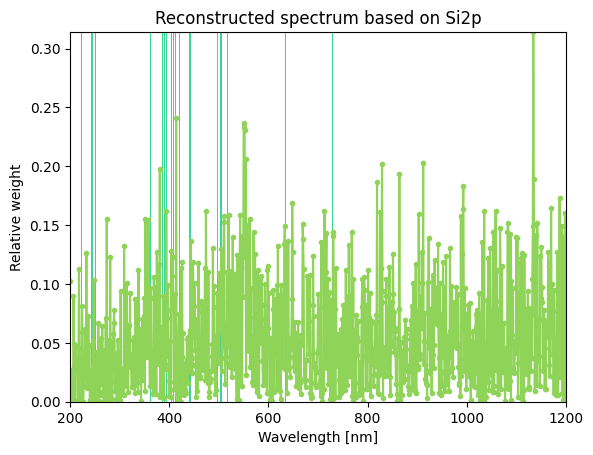

In [240]:
wv_Si = []
for idx, row in ref.iterrows():
    if 'Si' in row['name']:
        wv_Si.append(row['wavelength'])

col ='Si2p'
i=6
rl_Si = LinearRegression()
rl_Si.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_Si.coef_), '.-', color=colors[i])
plt.bar(wv_Si, np.ones(len(wv_Si)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_Si.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

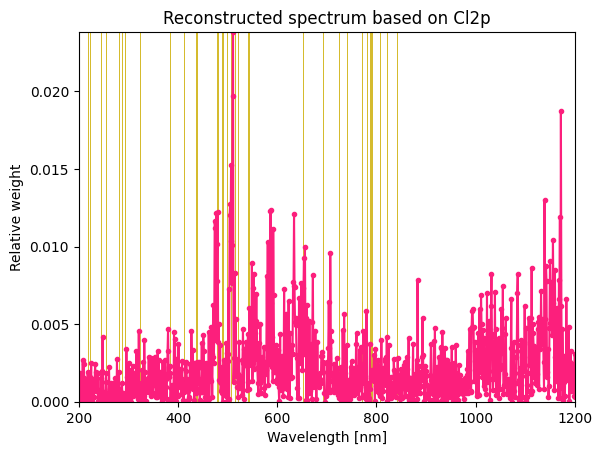

In [241]:
wv_cl = []
for idx, row in ref.iterrows():
    if 'Cl' in row['name']:
        wv_cl.append(row['wavelength'])

col ='Cl2p'
i=8
rl_cl = LinearRegression()
rl_cl.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_cl.coef_), '.-', color=colors[i])
plt.bar(wv_cl, np.ones(len(wv_cl)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_cl.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()